In [36]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from glob import glob
import cv2
import torch

In [52]:
gamma = torch.exp(torch.tensor((-1.5*iteration/options.experiment.train_iters)))

tensor(0.0149)

In [57]:
torch.exp(torch.tensor((-1.5*1.0)))

tensor(0.2231)

In [21]:
z_vals_fine2 = torch.load("rays/256/z_vals_fine/0.pt", map_location="cpu")

In [12]:
z_vals_fine = torch.load("rays/z_vals_fine/0.pt", map_location="cpu")

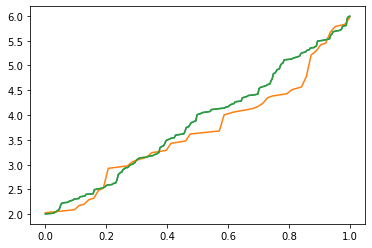

In [23]:
plt.plot(np.linspace(0,1,len(z_vals_fine[0])), z_vals_fine[0])
plt.plot(np.linspace(0,1,len(z_vals_fine1[0])), z_vals_fine1[0])
plt.plot(np.linspace(0,1,len(z_vals_fine2[0])), z_vals_fine2[0])

In [31]:
k = torch.arange(1, 65, 1)
u = ((torch.cos((2*k - 1)*3.1415926535/(2*64)) + 1)/2).sort()[0]

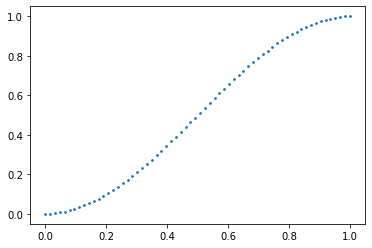

In [35]:
plt.scatter(torch.linspace(0,1,64), u, s=3)

In [14]:
z_vals_fine1 = torch.load("z_vals_fine.pt", map_location="cpu")

In [9]:
z_vals_fine1 = torch.load("z_vals_fine.pt", map_location="cpu")

In [5]:
z_vals_coarse = torch.load("z_vals_coarse.pt", map_location="cpu")
z_vals_fine = torch.load("z_vals_fine.pt", map_location="cpu")

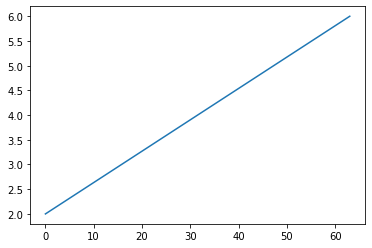

In [6]:
plt.plot(z_vals_coarse[0])

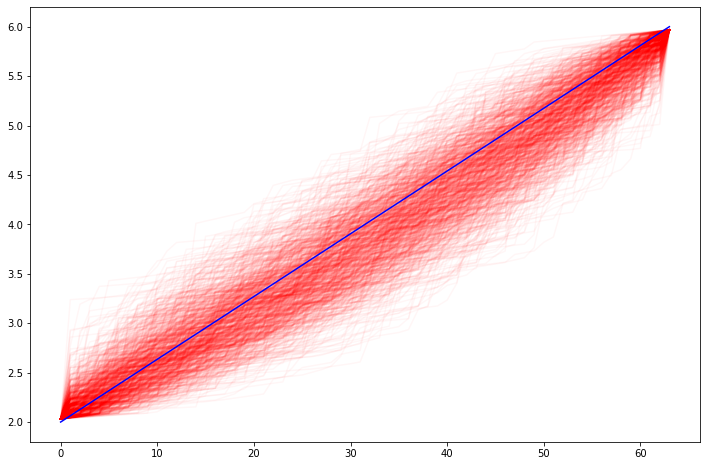

In [8]:
plt.figure(figsize=(12,8))
for i in range(1000):
    plt.plot(z_vals_fine[i].detach().numpy(), alpha=0.035, c="red")
plt.plot(z_vals_coarse[0].detach().numpy(), alpha=1, c="blue")
plt.show()

In [151]:
weights = torch.load("weights.pt", map_location="cpu")
bins = torch.load("bins.pt", map_location="cpu")

In [152]:
weights = weights + 1e-5
pdf = weights / torch.sum(weights, dim=-1, keepdim=True)
cdf = torch.cumsum(pdf, dim=-1)
cdf = torch.cat(
    [torch.zeros_like(cdf[..., :1]), cdf], dim=-1
)  # (batchsize, len(bins))


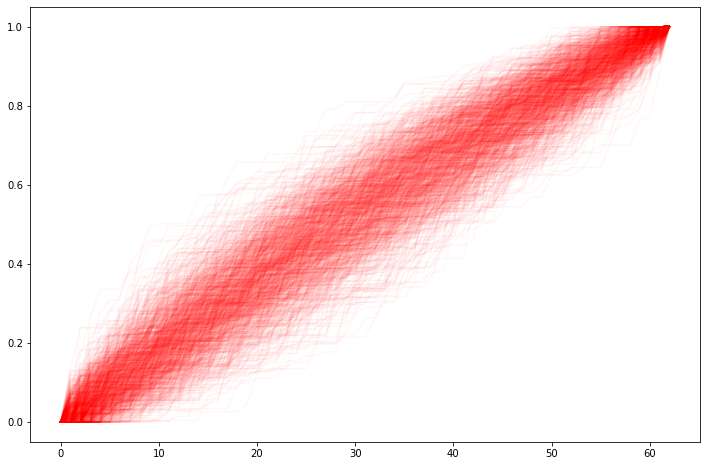

In [153]:
plt.figure(figsize=(12,8))
for i in torch.randperm(len(cdf))[:1000]:
    plt.plot(cdf[i].detach().numpy(), alpha=0.035, c="red")
plt.show()

(0.0, 1.0)

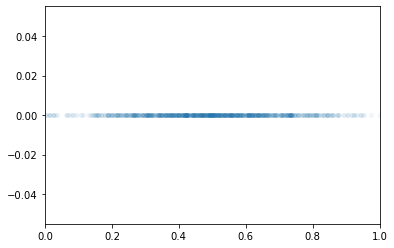

In [206]:
plt.scatter(torch.fmod(torch.normal(0.5, 0.2, [1000]), 1), np.zeros(1000), s=15, alpha=0.05)
plt.xlim(0,1)

In [187]:
torch.fmod(torch.normal(0.5, 0.2, [63]), 1)

tensor([0.5169, 0.5392, 0.3347, 0.6366, 0.6744, 0.5607, 0.6281, 0.7789, 0.5145,
        0.5569, 0.6919, 0.7667, 0.4018, 0.3806, 0.3166, 0.7109, 0.2510, 0.0421,
        0.7224, 0.6411, 0.5321, 0.7230, 0.3035, 0.7602, 0.4803, 0.7229, 0.3061,
        0.3599, 0.5456, 0.0768, 0.5447, 0.4955, 0.5888, 0.7235, 0.6315, 0.3621,
        0.3265, 0.2672, 0.3150, 0.5510, 0.3879, 0.3368, 0.5153, 0.8108, 0.2816,
        0.6874, 0.4162, 0.4701, 0.4099, 0.3333, 0.5240, 0.4840, 0.7222, 0.5392,
        0.7604, 0.3674, 0.4629, 0.7800, 0.2346, 0.3971, 0.4136, 0.7329, 0.4261])

In [184]:
num_samples =64
det = "normal"
# Take uniform samples
if det == "uniform":
    u = torch.linspace(
        0.3, 0.7, steps=num_samples, dtype=weights.dtype, device=weights.device
    )
    u = u.expand(list(cdf.shape[:-1]) + [num_samples])
elif det == "random":
    u = torch.rand(
        list(cdf.shape[:-1]) + [num_samples],
        dtype=weights.dtype,
        device=weights.device,
    )
elif det == "normal":
    u = torch.abs(torch.normal(0.5, 0.2, 
        list(cdf.shape[:-1]) + [num_samples],
        dtype=weights.dtype,
        device=weights.device,
    ))

# Invert CDF
u = u.contiguous()
cdf = cdf.contiguous()
inds = torch.searchsorted(cdf.detach(), u, right=True)
below = torch.max(torch.zeros_like(inds - 1), inds - 1)
above = torch.min((cdf.shape[-1] - 1) * torch.ones_like(inds), inds)
inds_g = torch.stack((below, above), dim=-1)  # (batchsize, num_samples, 2)

matched_shape = (inds_g.shape[0], inds_g.shape[1], cdf.shape[-1])
cdf_g = torch.gather(cdf.unsqueeze(1).expand(matched_shape), 2, inds_g)
bins_g = torch.gather(bins.unsqueeze(1).expand(matched_shape), 2, inds_g)

denom = cdf_g[..., 1] - cdf_g[..., 0]
denom = torch.where(denom < 1e-5, torch.ones_like(denom), denom)
t = (u - cdf_g[..., 0]) / denom
samples = bins_g[..., 0] + t * (bins_g[..., 1] - bins_g[..., 0])

In [185]:
torch.sort(u[0])

torch.return_types.sort(
values=tensor([0.0386, 0.0953, 0.1850, 0.1941, 0.2055, 0.2110, 0.2318, 0.2614, 0.2795,
        0.2797, 0.2871, 0.2883, 0.2892, 0.2912, 0.2913, 0.3145, 0.3150, 0.3304,
        0.3402, 0.3537, 0.3743, 0.3853, 0.3892, 0.3970, 0.3999, 0.4033, 0.4112,
        0.4356, 0.4411, 0.4501, 0.4802, 0.4950, 0.5038, 0.5145, 0.5182, 0.5301,
        0.5330, 0.5378, 0.5412, 0.5517, 0.5547, 0.5620, 0.5723, 0.5819, 0.5850,
        0.5969, 0.6050, 0.6113, 0.6146, 0.6344, 0.6368, 0.6542, 0.6579, 0.6583,
        0.6598, 0.6739, 0.6917, 0.7289, 0.7340, 0.7531, 0.7712, 0.7946, 0.8468,
        0.8639]),
indices=tensor([12,  8, 13, 11, 63, 31, 35, 62, 34, 57, 43, 33, 45, 21, 36,  2,  9,  4,
         0, 32, 38, 19, 54, 16, 47,  7, 56, 51, 61, 59,  3,  5, 28, 24, 29, 26,
        40, 15, 30, 23, 18, 48, 50, 41, 25, 22,  6, 10, 20, 44, 52, 60, 55, 27,
        46, 58, 42, 39, 49,  1, 37, 53, 14, 17]))

In [160]:
samples[0]

tensor([2.0317, 2.0418, 2.0519, 2.0619, 2.0720, 2.0820, 2.0921, 2.1769, 2.2034,
        2.2943, 2.3241, 2.4835, 2.5316, 2.9260, 2.9385, 2.9510, 2.9635, 2.9760,
        3.0592, 3.0927, 3.1240, 3.1526, 3.2417, 3.2572, 3.2727, 3.2882, 3.4306,
        3.4460, 3.4615, 3.4769, 3.6192, 3.6293, 3.6394, 3.6494, 3.6595, 3.6696,
        3.6797, 4.0063, 4.0336, 4.0610, 4.0790, 4.0961, 4.1132, 4.1346, 4.1742,
        4.2381, 4.3503, 4.3848, 4.4002, 4.4155, 4.4309, 4.5112, 4.5389, 4.5666,
        4.7729, 5.2116, 5.2879, 5.4184, 5.4467, 5.6781, 5.7850, 5.8076, 5.8302,
        5.9683], grad_fn=<SelectBackward>)

In [163]:
samples[0]

tensor([3.0894, 3.1028, 3.1155, 3.1269, 3.1383, 3.1498, 3.1612, 3.1727, 3.2432,
        3.2494, 3.2556, 3.2618, 3.2680, 3.2742, 3.2804, 3.2866, 3.2928, 3.2990,
        3.4321, 3.4383, 3.4445, 3.4507, 3.4568, 3.4630, 3.4692, 3.4754, 3.4816,
        3.4878, 3.6202, 3.6243, 3.6283, 3.6323, 3.6363, 3.6404, 3.6444, 3.6484,
        3.6525, 3.6565, 3.6605, 3.6646, 3.6686, 3.6726, 3.6766, 3.6807, 3.7744,
        4.0035, 4.0145, 4.0254, 4.0364, 4.0473, 4.0583, 4.0671, 4.0739, 4.0807,
        4.0876, 4.0944, 4.1012, 4.1081, 4.1149, 4.1217, 4.1306, 4.1465, 4.1623,
        4.1782], grad_fn=<SelectBackward>)

In [79]:
bins[0]

tensor([2.0317, 2.0952, 2.1587, 2.2222, 2.2857, 2.3492, 2.4127, 2.4762, 2.5397,
        2.6032, 2.6667, 2.7302, 2.7937, 2.8571, 2.9206, 2.9841, 3.0476, 3.1111,
        3.1746, 3.2381, 3.3016, 3.3651, 3.4286, 3.4921, 3.5556, 3.6190, 3.6825,
        3.7460, 3.8095, 3.8730, 3.9365, 4.0000, 4.0635, 4.1270, 4.1905, 4.2540,
        4.3175, 4.3810, 4.4444, 4.5079, 4.5714, 4.6349, 4.6984, 4.7619, 4.8254,
        4.8889, 4.9524, 5.0159, 5.0794, 5.1429, 5.2063, 5.2698, 5.3333, 5.3968,
        5.4603, 5.5238, 5.5873, 5.6508, 5.7143, 5.7778, 5.8413, 5.9048, 5.9683])

In [2]:
img = imageio.imread("data/nerf_synthetic/lego/train/r_99.png")

In [3]:
img_names = glob("data/nerf_synthetic/lego/*/r_??.png") + glob("data/nerf_synthetic/lego/*/r_?.png")

In [4]:
imgs = []
for img_name in img_names:
    img = imageio.imread(img_name)[:,:,:3] # 3 channel
    img = cv2.
    imgs.append(img)

In [5]:
imgs = np.asarray(imgs)

In [6]:
imgs.shape

(300, 800, 800, 3)

In [27]:
R,G,B = imgs[:,:,:,0], imgs[:,:,:,1], imgs[:,:,:,2]

In [29]:
R_flat = R.reshape(300,-1)

In [31]:
U,S,V = np.linalg.svd(R_flat)

MemoryError: Unable to allocate 2.98 TiB for an array with shape (640000, 640000) and data type float64

In [25]:
a = U[0:1,:,:40] @ S[0:1,:40]) @ V[0:1,:40,:]

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 40)

In [18]:
a = np.sum(a, axis=0)

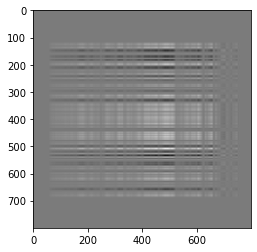

In [19]:
plt.imshow(a, cmap="gray")
plt.show()

In [13]:
img_recon = U[:1,:,:10] @ S[:1,:10] @ V[0,:10,:]

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 800)

In [54]:
U = np.mean(U, axis=0)

In [58]:
V = np.mean(V, axis=0) 

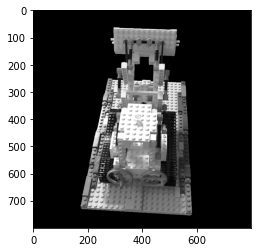

In [76]:
plt.imshow(img[:,:,0], cmap="gray")
plt.show()

In [86]:
img_comp = V[0:200] @ img[:,:,0]

In [87]:
img_recon = U[:,:200] @ img_comp

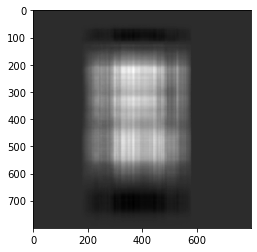

In [88]:
plt.imshow(img_recon, cmap="gray")

In [32]:
from sklearn.decomposition import IncrementalPCA

In [95]:
R,G,B = imgs[:,:,:,0], imgs[:,:,:,1], imgs[:,:,:,2]

In [52]:
ipca = IncrementalPCA(n_components=289)
X = ipca.fit_transform(R_flat)

In [53]:
X.shape

(300, 289)

In [54]:
Y = ipca.inverse_transform(X[0])

In [46]:
Y = Y.reshape(300,800,800)

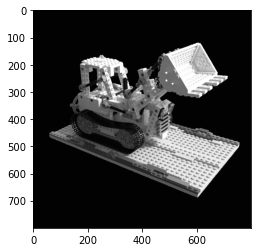

In [58]:
plt.imshow(Y.reshape(800,800), cmap="gray")

In [37]:
X.shape

(300, 100)